<a href="https://colab.research.google.com/github/hyydrra/Clustering_circular_data_using-perceptron/blob/master/Clustering_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Question2

In [ ]:
def generate_circular_data(circle_r, circle_x, circle_y, num_data):
  cluster = []
  x_cluster = []
  y_cluster = []
  mu=0
  mean=1
  for i in range(num_data):
    alpha = 2 * math.pi * np.random.uniform(0,1,1)[0]
    r = circle_r * math.sqrt(np.random.uniform(0,1,1)[0])
    #r = circle_r * np.random.uniform(0,1,1)[0]
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    cluster.append([x, y, x**2 + y**2])
    x_cluster.append(x)
    
  return cluster

def distance(x1,y1,x2,y2):
  dis = math.sqrt((x1-x2)**2 + (y1-y2)**2)
  return dis


In [ ]:
rmin=4
rmax=10
num_classes = 8
len_xy = rmax*num_classes/2


radiouses = []
centers = []
data_per_class=[]

#random number of data for each class
for i in range(num_classes):
  data_per_class.append(random.randrange(50, 300, 1))

#random_radiuses
for i in range(num_classes):
  r = rmin + random.random()*(rmax-rmin)
  radiouses.append(r/len_xy)

#random_centers
done=0
while done==0:
  x = random.random()
  y = random.random()

  okay_to_add=1
  for i in range(len(centers)):
    if distance(x, y, centers[i][0], centers[i][1]) < radiouses[len(centers)] + radiouses[i] :
      
      okay_to_add = 0
  
  if okay_to_add:
    centers.append([x,y])
  if len(centers)==num_classes:
    done =1


circles = []
all_data =[]
        
for i in range(num_classes):
  all_data.append([])
  all_data[i] = generate_circular_data(radiouses[i],centers[i][0],centers[i][1],data_per_class[i])


In [ ]:
circles = []

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(num_classes)]

plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='w', edgecolor='k')  
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)          
for i in range(num_classes):
  circles.append(plt.Circle((centers[i][0], centers[i][1]), radiouses[i], color="black", fill=False))

for i in range(len(all_data)):
  for point in all_data[i]:
    plt.scatter(point[0], point[1],color=colors[i])

for i in range(len(circles)):
  plt.gcf().gca().add_artist(circles[i])
plt.title("data")
plt.xlabel("X_axes")
plt.ylabel("Y_azes")
plt.show()

In [ ]:
n_input = 3
n_output = 1
def perceptron(hot_class):
  epochs = 300
  w = np.random.normal(1, 0.1,  size=(n_input, 1))
  b = np.random.normal(1, 0.1,  1)
  l = 0.01 #learning_rate
  teta = 0

  true=0
  for e in range(epochs):
    if true == sum(data_per_class):
      break
    true=0
    for i in range(len(all_data)):
      for j in range(len(all_data[i])):

        net = np.dot(all_data[i][j], w) + b
        if net >= teta:
          h = 1
        if net < -teta:
          h = -1


        if i ==hot_class:
          label = -1
        else:
          label = 1
        dw = l * np.array(all_data[i][j]).reshape((n_input,1)) * label
        
        if (h!=label):
          w = w+dw
          b = b +l*label
          w[2]=1

        if (h==label):
          true = true+1

    # if e%100==0:      
    #   print(e,true,sum(data_per_class))
  return w,b,true
    


0
1
2
3
4
5
6
7
accuracy of clustering is:  1.0


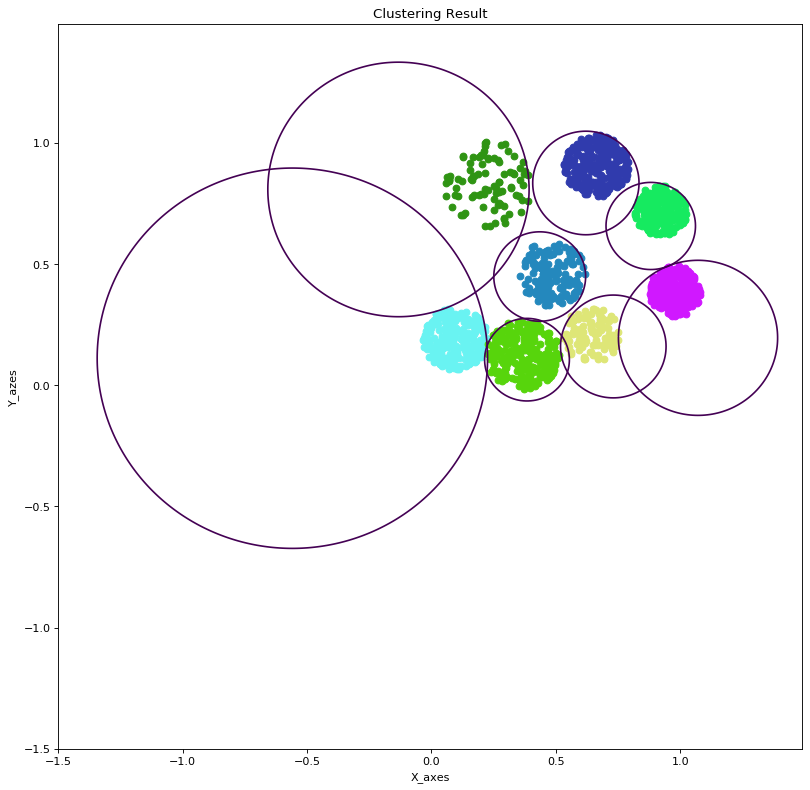

In [ ]:
plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='w', edgecolor='k')

delta = 0.01
x, y = np.meshgrid(
    np.arange(-1.5, 1.5, delta),
    np.arange(-1.5, 1.5, delta)
)

true_count = 0
for i in range(num_classes):
  print(i)
  w, b, temp_count_right=perceptron(i)
  true_count = true_count + temp_count_right
  plt.contour(
      x, y,
      w[2]*(y**2 + x**2) + w[0]*x + w[1]*y +b,
      [0]
  )

print("accuracy of clustering is: ",true_count/(num_classes*sum(data_per_class)))
for i in range(len(all_data)):
  for point in all_data[i]:
    plt.scatter(point[0], point[1],color=colors[i])
plt.title("Clustering Result")
plt.xlabel("X_axes")
plt.ylabel("Y_azes")
plt.show()